### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Loading Dataset

In [2]:
data = pd.read_csv("titanic_data.csv")

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Types of Features :** 
- **Categorical**  - Sex, and Embarked.
- **Continuous**  - Age, Fare
- **Discrete**     - SibSp, Parch.
- **Alphanumeric** - Cabin

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Numerical Value Analysis

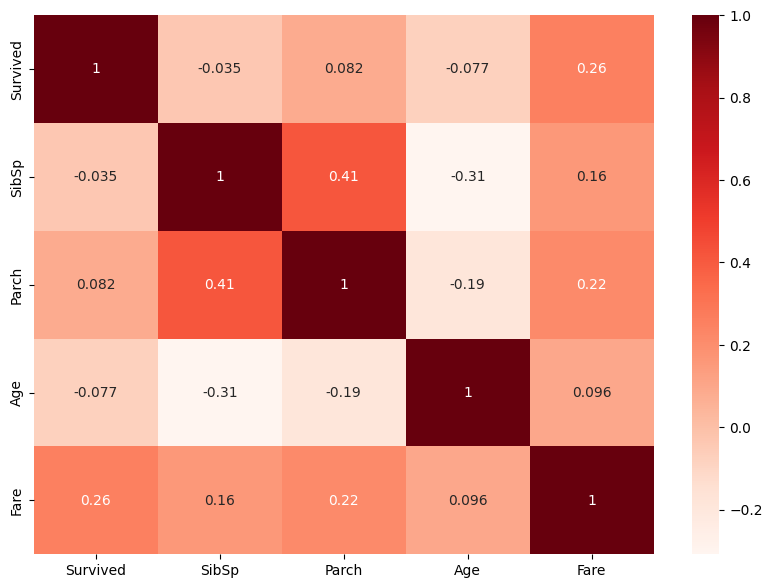

In [7]:
plt.figure(figsize=(10,7))
heatmap = sns.heatmap(data[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True, cmap="Reds")

### sibsp - Number of siblings / spouses aboard the Titanic

In [8]:
data['SibSp'].nunique()

7

In [9]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

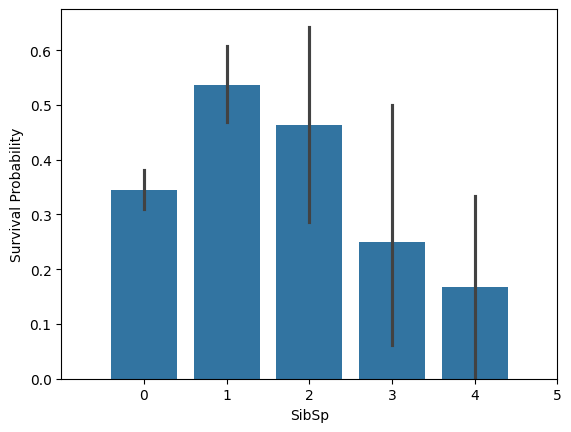

In [10]:
bargraph_sibsp = sns.barplot(x="SibSp", y="Survived", data=data)
bargraph_sibsp.set_ylabel("Survival Probability")
plt.xlim(-1,5)
plt.show()

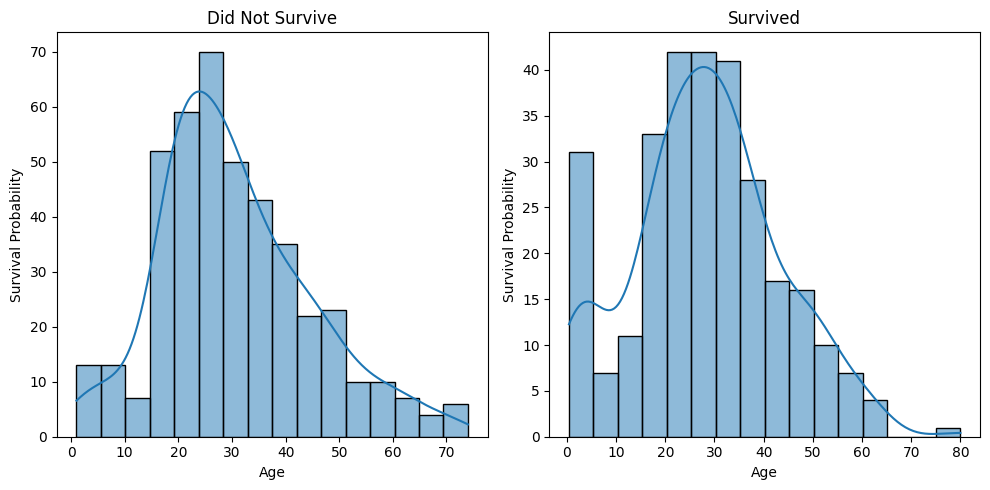

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(data[data["Survived"] == 0]["Age"], kde=True)
plt.title("Did Not Survive")
plt.ylabel("Survival Probability")

plt.subplot(1, 2, 2)
sns.histplot(data[data["Survived"] == 1]["Age"], kde=True)
plt.title("Survived")
plt.ylabel("Survival Probability")
plt.tight_layout()

plt.show()

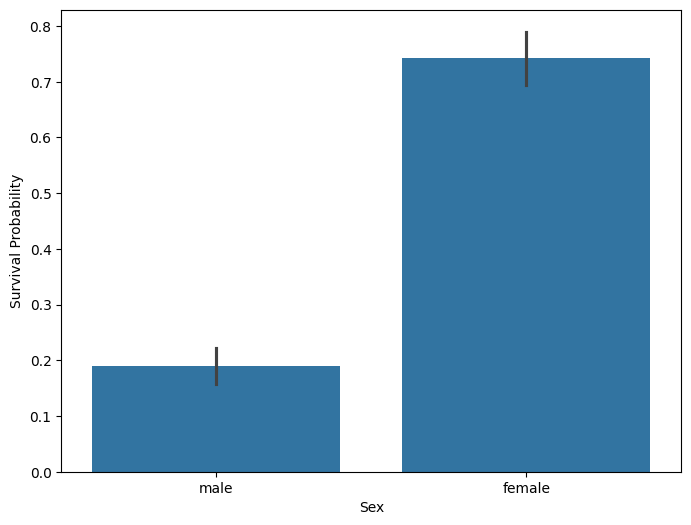

In [12]:
plt.figure(figsize=(8,6))
age_plot = sns.barplot(x="Sex", y="Survived", data=data)
age_plot = age_plot.set_ylabel("Survival Probability")

In [13]:
data[["Sex", "Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


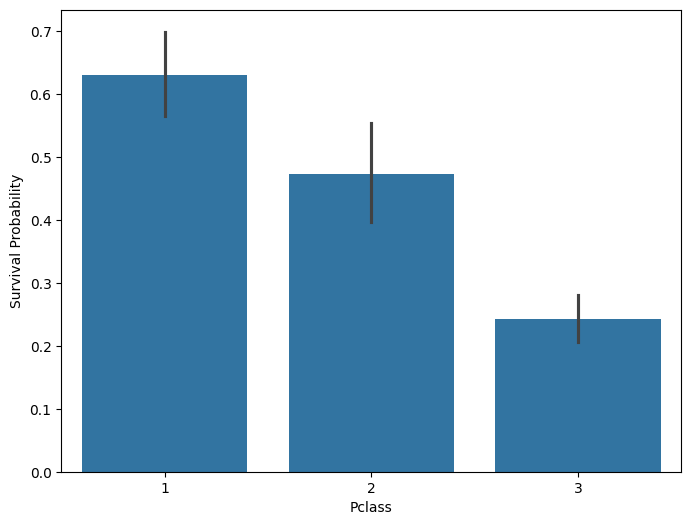

In [14]:
plt.figure(figsize=(8, 6))
pclass = sns.barplot(x="Pclass", y="Survived", data=data)
pclass.set_ylabel("Survival Probability")
plt.show()

### Pclass vs Survived by Sex

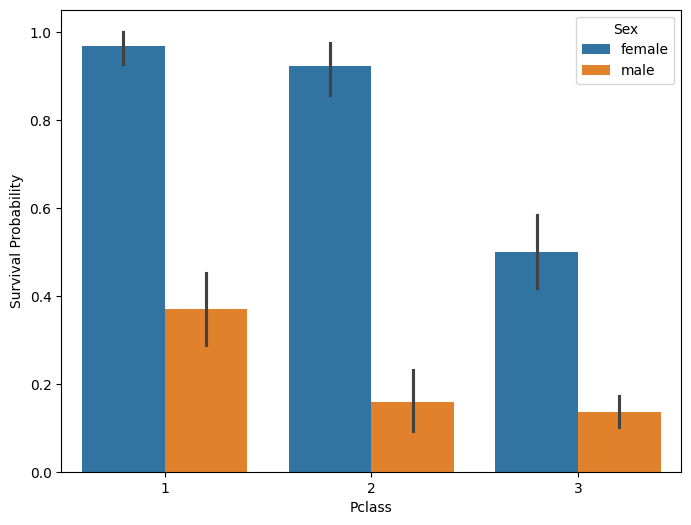

In [15]:
plt.figure(figsize=(8, 6))
g = sns.barplot(x="Pclass", y="Survived", hue="Sex", data=data)
g.set_ylabel("Survival Probability")
plt.show()

### Embarked

In [16]:
data["Embarked"].isnull().sum()

2

In [17]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
#Filling the Embarked with 'S'with the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

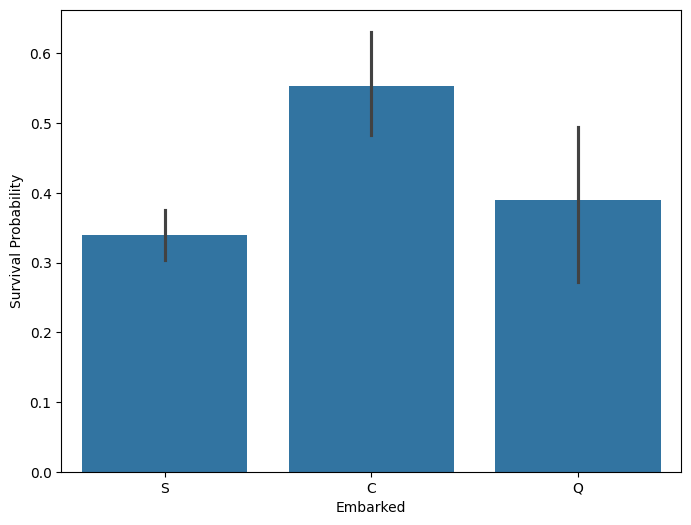

In [19]:
plt.figure(figsize=(8, 6))
g = sns.barplot(x="Embarked", y="Survived", data=data)
g.set_ylabel("Survival Probability")
plt.show()

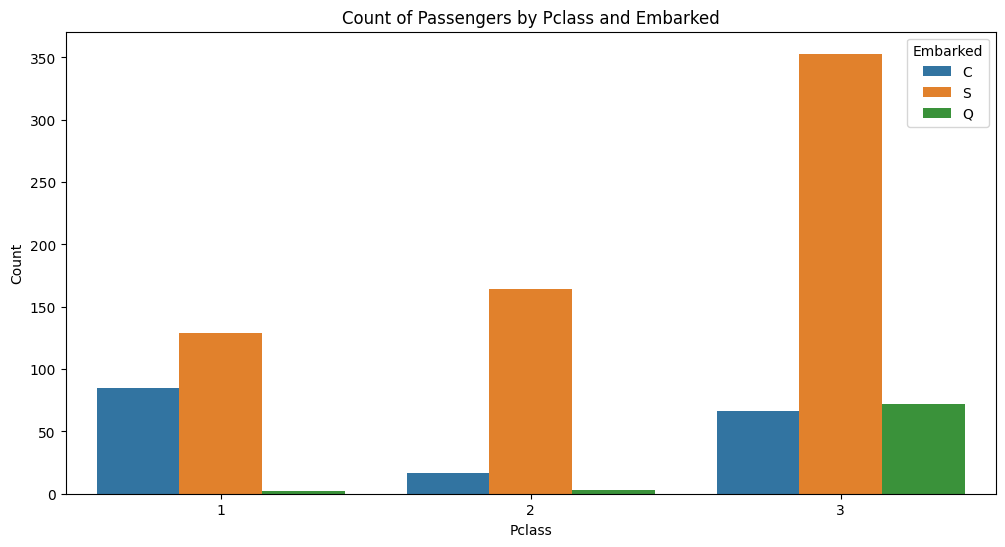

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Pclass", hue="Embarked")
plt.ylabel("Count")
plt.title("Count of Passengers by Pclass and Embarked")
plt.show()

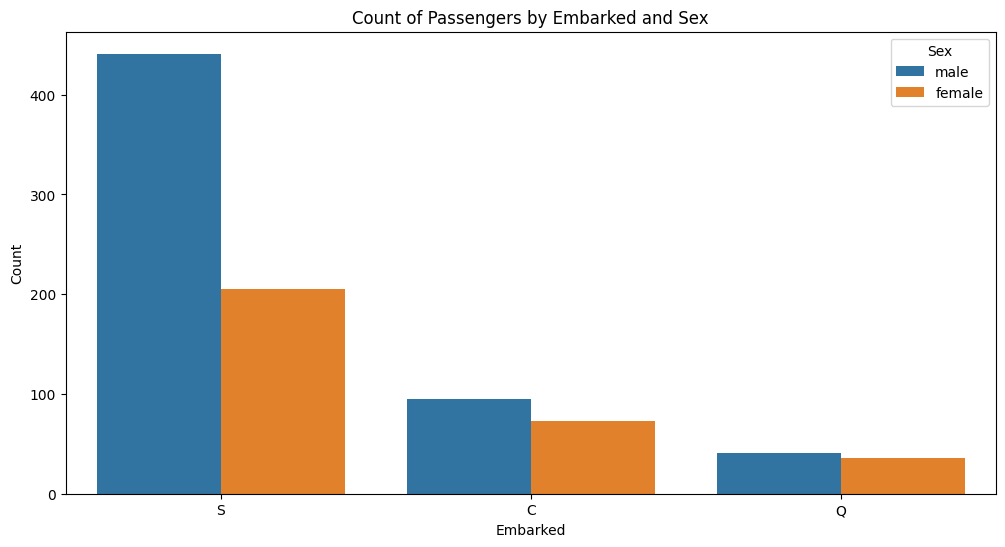

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Embarked", hue="Sex")
plt.ylabel("Count")
plt.title("Count of Passengers by Embarked and Sex")
plt.show()

### Preparing Data

In [22]:
data = pd.read_csv('titanic_data.csv')

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()

# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# fill NaN values in Age column with random values generated
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice

In [26]:
data["Age"].isnull().sum()

0

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
data["Embarked"].isnull().sum()

2

In [29]:
#Fill Embarked with 'S' i.e. the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

In [30]:
col_to_drop = ['PassengerId','Cabin', 'Ticket','Name']
data.drop(col_to_drop, axis=1, inplace = True)

In [31]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [32]:
genders = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(genders)

In [33]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [34]:
ports = {"S": 0, "C": 1, "Q": 2}
data['Embarked'] = data['Embarked'].map(ports)

In [35]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


### Splitting Data

In [37]:
# input and output data
x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

In [38]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [39]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
# splitting into training and testing data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

### Feature Scaling

In [41]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [42]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=42)

In [43]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [44]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [45]:
logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       168
           1       0.74      0.73      0.74       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268

Logistic Regression Confusion Matrix:

[[143  25]
 [ 27  73]]


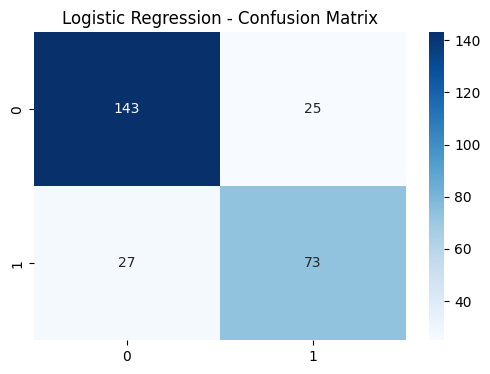

In [46]:
print("Logistic Regression Classification Report:\n")
print(classification_report(ytest, logreg_ypred))
print("Logistic Regression Confusion Matrix:\n")
logreg_cm = confusion_matrix(ytest, logreg_ypred)
print(logreg_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

Support Vector Classifier Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       168
           1       0.78      0.69      0.73       100

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

Support Vector Classifier Confusion Matrix:

[[149  19]
 [ 31  69]]


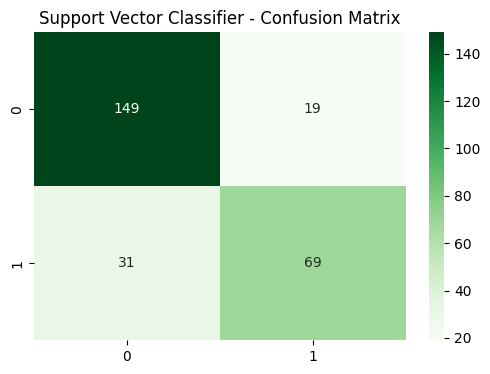

In [47]:
print("Support Vector Classifier Classification Report:\n")
print(classification_report(ytest, svc_classifier_ypred))
print("Support Vector Classifier Confusion Matrix:\n")
svc_cm = confusion_matrix(ytest, svc_classifier_ypred)
print(svc_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Support Vector Classifier - Confusion Matrix')
plt.show()

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       168
           1       0.70      0.70      0.70       100

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268

Decision Tree Confusion Matrix:

[[138  30]
 [ 30  70]]


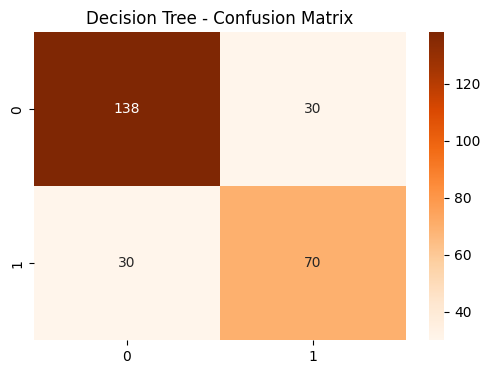

In [48]:
print("Decision Tree Classification Report:\n")
print(classification_report(ytest, dt_classifier_ypred))
print("Decision Tree Confusion Matrix:\n")
dt_cm = confusion_matrix(ytest, dt_classifier_ypred)
print(dt_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

K-NN Classifier Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.75      0.72      0.73       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.81      0.81       268

K-NN Classifier Confusion Matrix:

[[144  24]
 [ 28  72]]


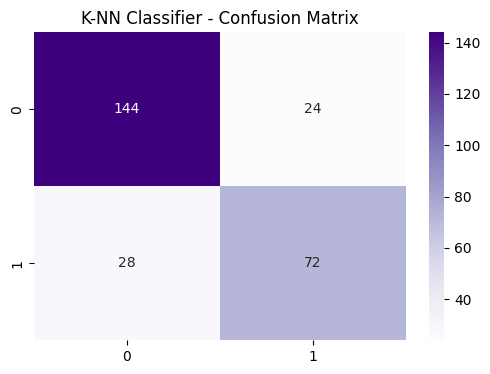

In [49]:
print("K-NN Classifier Classification Report:\n")
print(classification_report(ytest, knn_classifier_ypred))
print("K-NN Classifier Confusion Matrix:\n")
knn_cm = confusion_matrix(ytest, knn_classifier_ypred)
print(knn_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Purples')
plt.title('K-NN Classifier - Confusion Matrix')
plt.show()

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       168
           1       0.75      0.74      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Random Forest Confusion Matrix:

[[143  25]
 [ 26  74]]


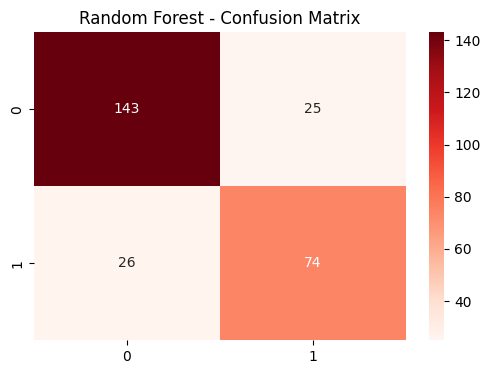

In [50]:
print("Random Forest Classification Report:\n")
print(classification_report(ytest, rf_classifier_ypred))
print("Random Forest Confusion Matrix:\n")
rf_cm = confusion_matrix(ytest, rf_classifier_ypred)
print(rf_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Random Forest - Confusion Matrix')
plt.show()

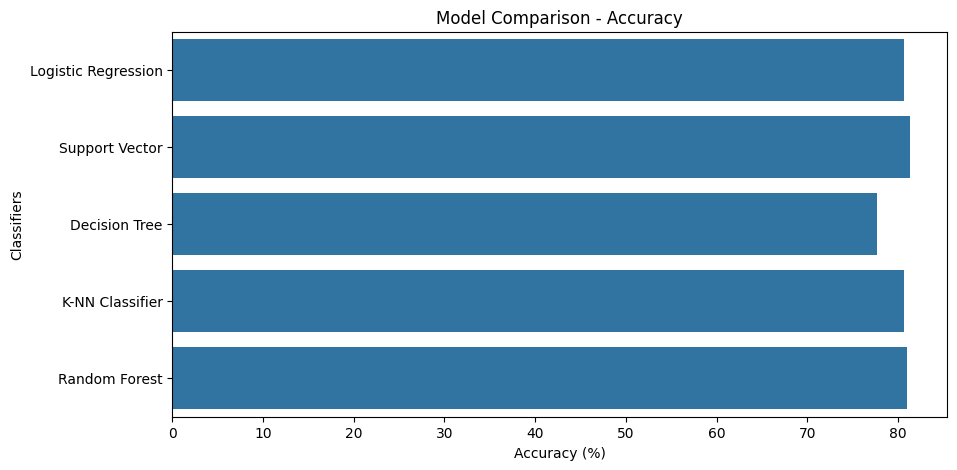

In [55]:
classifiers = ['Logistic Regression', 'Support Vector', 'Decision Tree', 'K-NN Classifier', 'Random Forest']
accuracies = [logreg_acc, svc_classifier_acc, dt_classifier_acc, knn_classifier_acc, rf_classifier_acc]

plt.figure(figsize=(10, 5))
sns.barplot(y=classifiers, x=[acc*100 for acc in accuracies])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Accuracy (%)')
plt.ylabel('Classifiers')
plt.show()